In [1]:
print("XGBoosting ")

XGBoosting 


## 22.3 XGBoost Training, Prediction & Key Parameters

### How XGBoost Training Works (Big Picture)

XGBoost training follows a disciplined correction loop:

1. Start with an initial prediction (base score)
2. Compute gradients and hessians
3. Build a tree that minimizes the objective
4. Compute optimal leaf weights
5. Update predictions using learning rate
6. Repeat until performance stops improving

> Key idea: **Each tree is weak on purpose. Strength comes from many controlled corrections.**


### Key Parameters You Must Understand

#### Core Structure
- `n_estimators`: number of trees  
- `max_depth`: depth of each tree  
- `learning_rate (eta)`: step size of updates  

Golden rule:
> High depth + high learning rate = overfitting speedrun


#### Regularization Parameters (XGBoost Superpower)

- `gamma`: minimum gain required for a split
- `reg_lambda`: L2 penalty on leaf weights
- `reg_alpha`: L1 penalty (sparsity)

These prevent XGBoost from memorizing noise.


#### Sampling Parameters

- `subsample`: fraction of rows used per tree
- `colsample_bytree`: fraction of features used per tree

> Sampling intentionally hides data to reduce overfitting.


Objective Function
Examples:

reg:squarederror → regression
binary:logistic → binary classification
multi:softprob → multiclass classification
Wrong objective = wrong math = useless model


#### Objective Function

Examples:
- `reg:squarederror` → regression
- `binary:logistic` → binary classification
- `multi:softprob` → multiclass classification

> Wrong objective = wrong math = useless model

In [10]:
import numpy as np 
import pandas as pd 
from sklearn.datasets  import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from xgboost import XGBClassifier

In [11]:
data = load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [14]:
#default XGBoost Model

model=XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,#amra tree ar jonno pura sample nibo na 80 percent nibo jar karone 
    #amader datar modde variance thakle and model biased hobe na overfitting hobe ne
    colsample_bytree=0.8,#as usally .2 percent variant thakbe
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42

)

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
y_pred=model.predict(x_test)
y_prob= model.predict_proba(x_test)[:,1]

In [16]:
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score :  0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [17]:
confusion_matrix(y_test,y_pred)

array([[39,  3],
       [ 1, 71]])

In [18]:
#early stopping (Overfitting control )
import xgboost as xgb

dtrain = xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test,label=y_test)

params={

    "objective":"binary:logistic",
    "eval_matric":"logloss",
    "max_depth":3,
    "eta":0.05,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

modelr=xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtest,"eval")],
    early_stopping_rounds=20
)

[0]	eval-logloss:0.61842
[1]	eval-logloss:0.58321
[2]	eval-logloss:0.55144
[3]	eval-logloss:0.52155
[4]	eval-logloss:0.49551
[5]	eval-logloss:0.47074
[6]	eval-logloss:0.44676
[7]	eval-logloss:0.42594
[8]	eval-logloss:0.40728


d:\anaconda\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:10:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_matric" } are not used.

  self.starting_round = model.num_boosted_rounds()


[9]	eval-logloss:0.38992
[10]	eval-logloss:0.37171
[11]	eval-logloss:0.35644
[12]	eval-logloss:0.34321
[13]	eval-logloss:0.32993
[14]	eval-logloss:0.31842
[15]	eval-logloss:0.30714
[16]	eval-logloss:0.29586
[17]	eval-logloss:0.28539
[18]	eval-logloss:0.27425
[19]	eval-logloss:0.26469
[20]	eval-logloss:0.25534
[21]	eval-logloss:0.24701
[22]	eval-logloss:0.23988
[23]	eval-logloss:0.23164
[24]	eval-logloss:0.22377
[25]	eval-logloss:0.21790
[26]	eval-logloss:0.21105
[27]	eval-logloss:0.20610
[28]	eval-logloss:0.20120
[29]	eval-logloss:0.19554
[30]	eval-logloss:0.19119
[31]	eval-logloss:0.18637
[32]	eval-logloss:0.18087
[33]	eval-logloss:0.17725
[34]	eval-logloss:0.17299
[35]	eval-logloss:0.16953
[36]	eval-logloss:0.16517
[37]	eval-logloss:0.16134
[38]	eval-logloss:0.15830
[39]	eval-logloss:0.15575
[40]	eval-logloss:0.15157
[41]	eval-logloss:0.14874
[42]	eval-logloss:0.14646
[43]	eval-logloss:0.14334
[44]	eval-logloss:0.14144
[45]	eval-logloss:0.13931
[46]	eval-logloss:0.13769
[47]	eval-log

In [19]:
y_prob = modelr.predict(dtest)

y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9649122807017544


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [21]:
print("Early Stopping Information: ")
print("Best Iteration:", modelr.best_iteration)
print("Best score [logloss]: ", modelr.best_score)

Early Stopping Information: 
Best Iteration: 117
Best score [logloss]:  0.08954768779834635


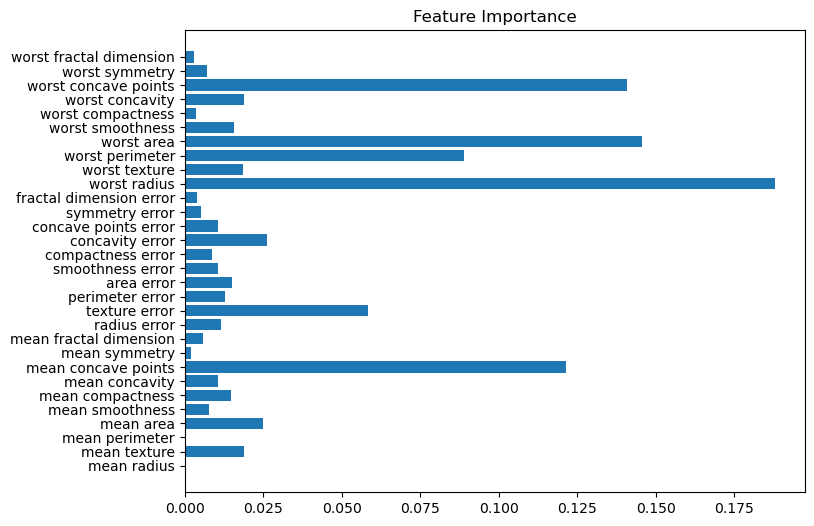

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(x.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()